In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

<h2>Define Hyper-parameters</h2>

In [2]:
lr = 0.01

epochs = 500


<h2>Define your input data and expected labels</h2>

In [3]:
x=np.array([[1,0],[0,1],[1,1],[0,0]])
y=np.array([[1],[1],[0],[0]])
tf.reset_default_graph()

<h2>Define placeholder and Variables</h2>

In [4]:

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape,stddev=0.1))
X = tf.placeholder(tf.float32, [None,2],name='X')
Y = tf.placeholder(tf.float32, [None,1],name='Y')

w1 = init_weights([2,2])
b1 = init_weights([2])
w2 = init_weights([2,1])
b2 = init_weights([1])

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define the neural network</h2>

In [5]:
def forward(x,w1,b1,w2,b2,train=True):
    Z = tf.nn.sigmoid(tf.matmul(x,w1)+b1)
    Z2 = tf.matmul(Z,w2)+b2
    if train:
        return Z2
    else:
        return tf.nn.sigmoid(Z2)
y_hat = forward(X,w1,b1,w2,b2)
pred = forward(X,w1,b1,w2,b2,False)

<h2>Define cost function</h2>

In [6]:
cost = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
                logits=y_hat,labels=Y))


train = tf.train.GradientDescentOptimizer(lr).minimize(cost)
#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(y_hat,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

costs = []



<h2>Execute training</h2>

In [7]:
init = tf.global_variables_initializer()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:

    sess.run(init)
    for i in range(epochs):
        sess.run(train,feed_dict={X:x,Y:y})
        c = sess.run(cost,feed_dict={X:x,Y:y})
        costs.append(c)
        if i % 100 ==0:
                acc = sess.run(accuracy,feed_dict={X:x, Y:y})
                print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    print("train complete")
    
    W1 = np.squeeze(sess.run(w1))
    b1 = np.squeeze(sess.run(b1))
    W2 = np.squeeze(sess.run(w2))
    b2 = np.squeeze(sess.run(b2))

step 0, Accuracy= 1.000
step 100, Accuracy= 1.000
step 200, Accuracy= 1.000
step 300, Accuracy= 1.000
step 400, Accuracy= 1.000
train complete


<h2>Plot</h2>

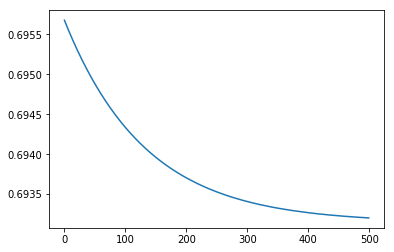

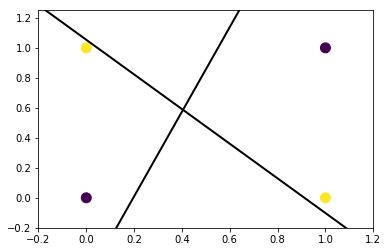

In [8]:
#plot cost
plt.plot(costs)
plt.show()
W1=W1.flatten()
#plot decision boundaries
plot_x1 = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y1 = 1 / W1[1] * (-W1[0] * plot_x1 - b1)
plot_x2 = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y2 = 1 / W2[1] * (-W2[0] * plot_x2 - b2)
plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y), s=100, cmap='viridis')
plt.plot(plot_x1, plot_y1, color='k', linewidth=2)
plt.plot(plot_x2, plot_y2, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()